### Import Dependencies

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

### Load Data

In [18]:
file = 'preprocessed_data.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Company Name,City,State,Shipping Service,Created Date,Item/Bottle Count
0,0,3,7981,9,14,1/1/20,3.0
1,1,3,5188,4,14,12/31/19,10.0
2,2,3,6939,34,1,1/1/20,8.0
3,3,3,6939,34,1,1/2/20,6.0
4,4,3,10666,20,4,12/31/19,12.0


### Split Data into Training and Test sets
- RandomForest cannot extrapolate values outside of what is in the training data, so we can include random samples from every month of the year in the training set.

- We will not scale the data as it is unnecessary for RandomForest models.

In [31]:
# convert 'Created Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], infer_datetime_format=True)

# create column to hold 'Month' values
df['Month'] = df['Created Date'].dt.month

In [20]:
# split data by month
jan_df = df.loc[df['Month'] == 1]
feb_df = df.loc[df['Month'] == 2]
mar_df = df.loc[df['Month'] == 3]
apr_df = df.loc[df['Month'] == 4]
may_df = df.loc[df['Month'] == 5]
june_df = df.loc[df['Month'] == 6]
july_df = df.loc[df['Month'] == 7]
aug_df = df.loc[df['Month'] == 8]
sep_df = df.loc[df['Month'] == 9]
oct_df = df.loc[df['Month'] == 10]
nov_df = df.loc[df['Month'] == 11]
dec_df = df.loc[df['Month'] == 12]


In [21]:
# get random training data from each month

# January
X_jan = jan_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_jan = jan_df['Item/Bottle Count']
X_train_jan, X_test_jan, y_train_jan, y_test_jan = train_test_split(X_jan, y_jan, random_state=1)

# February
X_feb = feb_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_feb = feb_df['Item/Bottle Count']
X_train_feb, X_test_feb, y_train_feb, y_test_feb = train_test_split(X_feb, y_feb, random_state=1)

# March
X_mar = mar_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_mar = mar_df['Item/Bottle Count']
X_train_mar, X_test_mar, y_train_mar, y_test_mar = train_test_split(X_mar, y_mar, random_state=1)

# April
X_apr = apr_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_apr = apr_df['Item/Bottle Count']
X_train_apr, X_test_apr, y_train_apr, y_test_apr = train_test_split(X_apr, y_apr, random_state=1)

# May
X_may = may_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_may = may_df['Item/Bottle Count']
X_train_may, X_test_may, y_train_may, y_test_may = train_test_split(X_may, y_may, random_state=1)

# June
X_june = june_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_june = june_df['Item/Bottle Count']
X_train_june, X_test_june, y_train_june, y_test_june = train_test_split(X_june, y_june, random_state=1)

# July
X_july = july_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_july = july_df['Item/Bottle Count']
X_train_july, X_test_july, y_train_july, y_test_july = train_test_split(X_july, y_july, random_state=1)

# August
X_aug = aug_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_aug = aug_df['Item/Bottle Count']
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_aug, y_aug, random_state=1)

# September
X_sep = sep_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_sep = sep_df['Item/Bottle Count']
X_train_sep, X_test_sep, y_train_sep, y_test_sep = train_test_split(X_sep, y_sep, random_state=1)

# October
X_oct = oct_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_oct = oct_df['Item/Bottle Count']
X_train_oct, X_test_oct, y_train_oct, y_test_oct = train_test_split(X_oct, y_oct, random_state=1)

# November
X_nov = nov_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_nov = nov_df['Item/Bottle Count']
X_train_nov, X_test_nov, y_train_nov, y_test_nov = train_test_split(X_nov, y_nov, random_state=1)

# December
X_dec = dec_df.drop(columns=['Created Date','Item/Bottle Count'], axis=1)
y_dec = dec_df['Item/Bottle Count']
X_train_dec, X_test_dec, y_train_dec, y_test_dec = train_test_split(X_dec, y_dec, random_state=1)


In [22]:
# combine training and test data from all months into X_train_all, X_test_all, y_train_all, y_test_all
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

X_train_all = pd.concat([X_train_jan,
    X_train_feb,
    X_train_mar,
    X_train_apr,
    X_train_may,
    X_train_june,
    X_train_july,
    X_train_aug,
    X_train_sep,
    X_train_oct,
    X_train_nov,
    X_train_dec])

X_test_all = pd.concat([X_test_jan,
    X_test_feb,
    X_test_mar,
    X_test_apr,
    X_test_may,
    X_test_june,
    X_test_july,
    X_test_aug,
    X_test_sep,
    X_test_oct,
    X_test_nov,
    X_test_dec])

y_train_all = pd.concat([y_train_jan,
    y_train_feb,
    y_train_mar,
    y_train_apr,
    y_train_may,
    y_train_june,
    y_train_july,
    y_train_aug,
    y_train_sep,
    y_train_oct,
    y_train_nov,
    y_train_dec])

y_test_all = pd.concat([y_test_jan,
    y_test_feb,
    y_test_mar,
    y_test_apr,
    y_test_may,
    y_test_june,
    y_test_july,
    y_test_aug,
    y_test_sep,
    y_test_oct,
    y_test_nov,
    y_test_dec])

print(X_train_all.shape, y_train_all.shape,
    X_test_all.shape, y_test_all.shape)

(176997, 6) (176997,) (59006, 6) (59006,)


In [23]:
# # split into features and target without seperating by month (may not get samples from all months)
# X = df.drop(columns=['Created Date', 'Item/Bottle Count'], axis=1)
# y = df['Item/Bottle Count']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Build RandomForestRegressor Model

In [24]:
# Build model with all months sampled

# Fit classifier models with different max_depth
regr_1 = RandomForestRegressor(max_depth=5)
regr_2 = RandomForestRegressor(max_depth=10)
regr_3 = RandomForestRegressor(max_depth=20)
regr_4 = RandomForestRegressor(max_depth=None)

regr_1.fit(X_train_all,y_train_all)
regr_2.fit(X_train_all,y_train_all)
regr_3.fit(X_train_all,y_train_all)
regr_4.fit(X_train_all,y_train_all)


# # Build model with standard random sample

# # Fit classifier models with different max_depth
# regr_5 = RandomForestRegressor(max_depth=5)
# regr_6 = RandomForestRegressor(max_depth=10)
# regr_7 = RandomForestRegressor(max_depth=20)
# regr_8 = RandomForestRegressor(max_depth=None)

# regr_5.fit(X_train,y_train)
# regr_6.fit(X_train,y_train)
# regr_7.fit(X_train,y_train)
# regr_8.fit(X_train,y_train)

# WILL TAKE ABOUT 6 MINUTES TO COMPLETE

RandomForestRegressor()

In [25]:
y_pred1 = regr_1.predict(X_test_all)
y_pred2 = regr_2.predict(X_test_all)
y_pred3 = regr_3.predict(X_test_all)
y_pred4 = regr_4.predict(X_test_all)

# y_pred5 = regr_5.predict(X_test)
# y_pred6 = regr_6.predict(X_test)
# y_pred7 = regr_7.predict(X_test)
# y_pred8 = regr_8.predict(X_test)

### Print R-Squared Scores (how well does the model predict the target variable)
- Mean Squared Error (MSE): mean or average of the squared differences between predicted and target values.(unit of measurement = squared 'Item/Bottle Count')
    - errors = mean_squared_error(expected, predicted)
- Root Mean Squared Error (RMSE): square root of MSE.(unit of measurement = 'Item/Bottle Count')
    - ex: errors = mean_squared_error(y_expected, y_predicted, squared=False)
- Mean Absolute Error (MAE): mean or average of the absolute error or difference between predicted and target values.(unit of measurement = 'Item/Bottle Count')
    - ex: errors = mean_absolute_error(y_expected, y_predicted)

In [26]:
# Scores for model with all months sampled

print("----------------------------------------")
print("Train model with ALL MONTHS")
print("----------------------------------------")
# Training Score
print("Training Score Max Depth=5: ", regr_1.score(X_train_all,y_train_all))
print("Training Score Max Depth=10: ", regr_2.score(X_train_all,y_train_all))
print("Training Score Max Depth=20: ", regr_3.score(X_train_all,y_train_all))
print("Training Score Max Depth=None: ", regr_4.score(X_train_all,y_train_all))

print("----------------------------------------")
# Test Score
print("Test Score Max Depth=5: ", regr_1.score(X_test_all, y_test_all))
print("Test Score Max Depth=10: ", regr_2.score(X_test_all, y_test_all))
print("Test Score Max Depth=20: ", regr_3.score(X_test_all, y_test_all))
print("Test Score Max Depth=None: ", regr_4.score(X_test_all, y_test_all))

print("----------------------------------------")
# Mean Squared Error
print("MSE: ", mean_squared_error(y_test_all, y_pred1))
print("MSE: ", mean_squared_error(y_test_all, y_pred2))
print("MSE: ", mean_squared_error(y_test_all, y_pred3))
print("MSE: ", mean_squared_error(y_test_all, y_pred4))

print("----------------------------------------")
# Root Mean Squared Error
print("RMSE: ", mean_squared_error(y_test_all, y_pred1, squared=False))
print("RMSE: ", mean_squared_error(y_test_all, y_pred2, squared=False))
print("RMSE: ", mean_squared_error(y_test_all, y_pred3, squared=False))
print("RMSE: ", mean_squared_error(y_test_all, y_pred4, squared=False))

print("----------------------------------------")
# Mean Absolute Error
print("MAE: ", mean_absolute_error(y_test_all, y_pred1))
print("MAE: ", mean_absolute_error(y_test_all, y_pred2))
print("MAE: ", mean_absolute_error(y_test_all, y_pred3))
print("MAE: ", mean_absolute_error(y_test_all, y_pred4))


# # Scores for model with standard random sample

# print("----------------------------------------")
# print("Train model with standard random sample")
# print("----------------------------------------")
# # Training Score
# print("Training Score Max Depth=5: ", regr_1.score(X_train,y_train))
# print("Training Score Max Depth=10: ", regr_2.score(X_train,y_train))
# print("Training Score Max Depth=20: ", regr_3.score(X_train,y_train))
# print("Training Score Max Depth=None: ", regr_4.score(X_train,y_train))

# # Test Score
# print("Test Score Max Depth=5: ", regr_1.score(X_test, y_test))
# print("Test Score Max Depth=10: ", regr_2.score(X_test, y_test))
# print("Test Score Max Depth=20: ", regr_3.score(X_test, y_test))
# print("Test Score Max Depth=None: ", regr_4.score(X_test, y_test))

----------------------------------------
Train model with ALL MONTHS
----------------------------------------
Training Score Max Depth=5:  0.7189807288097771
Training Score Max Depth=10:  0.7774362774775301
Training Score Max Depth=20:  0.8303218591929954
Training Score Max Depth=None:  0.8431434646708835
----------------------------------------
Test Score Max Depth=5:  0.06064960860128732
Test Score Max Depth=10:  0.04717165591506123
Test Score Max Depth=20:  0.05078256531671965
Test Score Max Depth=None:  0.058580141884589265
----------------------------------------
MSE:  155.91276820784725
MSE:  158.14983004582115
MSE:  157.55049364726807
MSE:  156.25625695014068
----------------------------------------
RMSE:  12.48650344203081
RMSE:  12.575763596928066
RMSE:  12.551911951860882
RMSE:  12.500250275500115
----------------------------------------
MAE:  1.7537340451807215
MAE:  1.6896234893037194
MAE:  1.6360295891295396
MAE:  1.7040880588414737


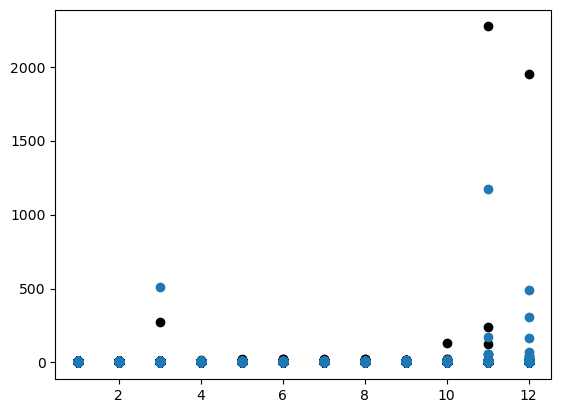

In [28]:
# Plot 'Item/Bottle Count' with 'Month'

# True Test Dataset
plt.scatter(X_test_all['Month'].values, y_test_all, color='black')

# Max Depth = None
plt.scatter(X_test_all['Month'].values, y_pred4)


In [32]:
# find cells where 'Item/Bottle Count' is greater than 2000
high_count = df[df['Item/Bottle Count']>500]
high_count

,Unnamed: 0,Company Name,City,State,Shipping Service,Created Date,Item/Bottle Count,Month
28148,28148,3,6798,4,18,2020-03-05,672.0,3
28149,28149,3,6798,4,18,2020-03-05,672.0,3
187153,187153,1,1952,34,18,2020-11-13,2072.0,11
187157,187157,1,6798,4,18,2020-11-13,2272.0,11
208385,208385,1,1952,34,18,2020-12-08,1950.0,12
216641,216641,1,6663,4,18,2020-12-08,1950.0,12
216673,216673,1,6798,4,18,2020-12-18,654.0,12
